In [1]:
!pip install -q ultralytics roboflow opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.9 MB/s eta 0:00:00


In [2]:
import os
import cv2
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="Xr18Ag9t4yjLNhm0tJvN")

project = rf.workspace("xray-u9rf3").project("wsiroisimages")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wsiroisImages-1 in yolov8:: 100%|██████████| 3767/3767 [00:00<00:00, 11266.27it/s]


In [5]:
with open("wsiroisImages-1/data.yaml", "r") as f:
    data_cfg = yaml.safe_load(f)

data_cfg


{'names': ['lymphocytes and plasma cells'],
 'nc': 1,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'wsiroisimages',
  'url': 'https://universe.roboflow.com/xray-u9rf3/wsiroisimages/dataset/1',
  'version': 1,
  'workspace': 'xray-u9rf3'},
 'test': '../test/images',
 'train': '../train/images',
 'val': '../valid/images'}

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

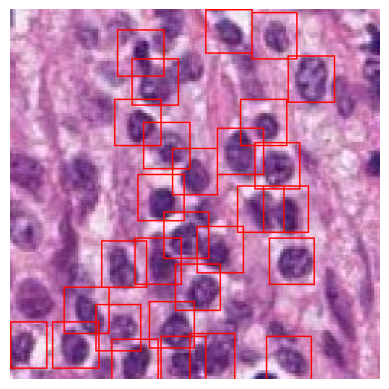

In [6]:
img_path = "wsiroisimages-1/train/images"
lbl_path = "wsiroisimages-1/train/labels"

img_file = os.listdir(img_path)[0]
label_file = img_file.replace(".jpg", ".txt")

img = cv2.imread(os.path.join(img_path, img_file))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape

with open(os.path.join(lbl_path, label_file)) as f:
    for line in f:
        cls, xc, yc, bw, bh = map(float, line.split())
        x1 = int((xc - bw/2) * w)
        y1 = int((yc - bh/2) * h)
        x2 = int((xc + bw/2) * w)
        y2 = int((yc + bh/2) * h)
        cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 1)

plt.imshow(img)
plt.axis("off")


In [7]:
model = YOLO("yolov8s.pt")


In [8]:
model.train(
    data="wsiroisimages-1/data.yaml",
    imgsz=512,
    epochs=50,
    batch=8,
    optimizer="AdamW",
    lr0=1e-3,
    device=0,
    workers=4,
    project="TIGER_TILs",
    name="yolov8_tils_detector"
)


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=wsiroisimages-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8_tils_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, pers

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7534347380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
metrics = model.val()
metrics


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 642.2±208.6 MB/s, size: 14.1 KB)
val: Scanning /content/wsiroisimages-1/valid/labels.cache... 376 images, 146 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 376/376 143.4Mit/s 0.0s
val: /content/wsiroisimages-1/valid/images/TC_S01_P000113_C0001_B101_-33354-86458-34598-87564-_png.rf.0d753e9a144f7988bef3c5da25c3fedd.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 24/24 3.1it/s 7.7s
                   all        376       6661       0.65      0.637      0.674      0.429
Speed: 0.9ms preprocess, 6.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c750881fb30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
model.predict(
    source="wsiroisimages-1/valid/images",
    imgsz=512,
    conf=0.25,
    save=True
)



image 1/376 /content/wsiroisimages-1/valid/images/100B_-35129-6567-36429-7757-_png.rf.a26ea795974dd0c1163a4030db4c0eb0.jpg: 512x512 129 lymphocytes and plasma cellss, 11.1ms
image 2/376 /content/wsiroisimages-1/valid/images/134B_-52914-12263-54149-13444-_png.rf.e8fe08ff6cb9f97f3ca65afbf1de5397.jpg: 512x512 300 lymphocytes and plasma cellss, 13.3ms
image 3/376 /content/wsiroisimages-1/valid/images/136B_-73791-8482-75066-9666-_png.rf.29577c350bb72a83e5ffab52e731648f.jpg: 512x512 38 lymphocytes and plasma cellss, 12.0ms
image 4/376 /content/wsiroisimages-1/valid/images/154B_-2199-20514-3357-21703-_png.rf.979afcfb4e96071f0d22c8c281bf7c09.jpg: 512x512 180 lymphocytes and plasma cellss, 11.0ms
image 5/376 /content/wsiroisimages-1/valid/images/181S_-34272-32152-35623-33367-_png.rf.81fad14b01921f6438f35341683677d3.jpg: 512x512 32 lymphocytes and plasma cellss, 11.5ms
image 6/376 /content/wsiroisimages-1/valid/images/196S_-7964-15811-9098-16894-_png.rf.38389b4e867383f829a2aa6bc5c3fffd.jpg: 512

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lymphocytes and plasma cells'}
 obb: None
 orig_img: array([[[238, 226, 246],
         [233, 221, 241],
         [165, 150, 171],
         ...,
         [211, 173, 209],
         [233, 197, 233],
         [185, 149, 185]],
 
        [[230, 218, 238],
         [231, 219, 239],
         [183, 168, 189],
         ...,
         [180, 144, 180],
         [200, 164, 200],
         [222, 189, 224]],
 
        [[235, 221, 239],
         [235, 221, 239],
         [201, 187, 205],
         ...,
         [185, 151, 188],
         [170, 136, 173],
         [212, 179, 216]],
 
        ...,
 
        [[191, 173, 190],
         [228, 210, 227],
         [239, 217, 236],
         ...,
         [204, 169, 213],
         [206, 171, 215],
         [199, 164, 208]],
 
        [[182, 166, 183],
         [236, 220, 237],
         [235, 215, 234],
         .